In [44]:
import h5py
f = h5py.File("/Project0551/jingyi/deepgtt/data/trainpath/150105.h5", 'r')
print(list(f.keys()))
dset = f['1']

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '8', '9']


In [45]:
dset.shape

AttributeError: 'Group' object has no attribute 'shape'

In [ ]:
dset.keys()


In [ ]:
dist = dset['distance']

In [ ]:
dist


In [ ]:
dist.keys()

In [46]:
import torch

In [47]:
a = torch.tensor([[[1, 4], [7, 10]], [[2, 5], [8, 11]], [[3, 6], [9, 12]]])

In [48]:
a.shape

torch.Size([3, 2, 2])

In [49]:
a = a.permute(1, 2, 0)

In [50]:
a

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

In [51]:
a.shape

torch.Size([2, 2, 3])

In [52]:
a_flatten = torch.flatten(a, end_dim=1)

In [53]:
a_flatten

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [54]:
a_stack = torch.stack([a_flatten[0], a_flatten[1]], 0)

In [55]:
a_flatten.shape

torch.Size([4, 3])

In [56]:
a_stack.shape

torch.Size([2, 3])

In [57]:
b = torch.ones(2, 4, 3)

In [58]:
a_expand = torch.unsqueeze(a_stack, 1).expand(-1, b.size(1), -1)

In [59]:
a_stack

tensor([[1, 2, 3],
        [4, 5, 6]])

In [60]:
a_expand

tensor([[[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]],

        [[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]])

In [61]:
print(1)

1


In [62]:
import h5py
import numpy as np
with h5py.File("../julia/test_matrix.h5") as f:
    print(np.array(f["tmap"]))
    S = np.rot90(f["tmap"]).copy()
    S = np.transpose(f["tmap"]).copy()
print(S)
print(S[0][0], S[0][1], S[1][0], S[1][1])

[[1. 3.]
 [2. 4.]]
[[1. 2.]
 [3. 4.]]
1.0 2.0 3.0 4.0


/home/jingyi/fyp/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
with h5py.File("/Project0551/jingyi/deepgtt/data/trainpath-fmm-spatial/150103.h5") as f:
        S = np.transpose(f["/1/S"]).copy()

/home/jingyi/fyp/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


In [77]:
S.shape

(138, 148)

In [78]:
print('percentage of zero entry in current: ', np.count_nonzero((S==0)) / (138*148))

percentage of zero entry in current:  0.6660791226008618


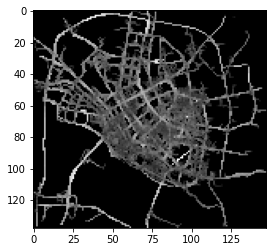

In [79]:
plt.imshow(S, cmap='gray')

In [80]:
print(np.min(S))
print(np.max(S))

0.0
34.853214


In [81]:
print(np.mean(S))

4.637991


In [82]:
from scipy import signal
def feature_completion_spatial(fmap):
#     print("number of non-empty features before completion: " + str(np.count_nonzero((fmap==0)) / (138*148)))
    result = np.copy(fmap)
    conv = np.ones((3,3))
    conv_map = signal.convolve2d(fmap, conv, boundary='symm', mode='same')
    conv_bitmap = signal.convolve2d(fmap!=0, conv, boundary='symm', mode='same')
    result_smooth = conv_map / conv_bitmap
    result[np.logical_and((result==0), (conv_bitmap!=0))] = result_smooth[np.logical_and((result==0), (conv_bitmap!=0))]
#     print("number of empty features after completion: " + str(np.count_nonzero((result==0)) / (138*148)))
    return result

# for i in range(1):
#     print('percentage of zero entry in current: ', np.count_nonzero((S==0)) / (138*148))
#     S = feature_completion_spatial(S)

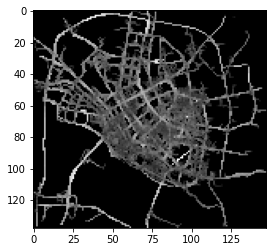

In [83]:
plt.imshow(S, cmap='gray')

In [84]:
import db_osmnx_utils as db_utils

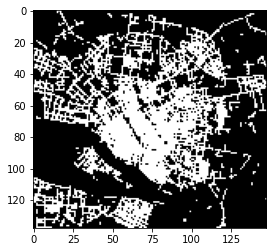

In [85]:

mask = db_utils.get_map_mask()
plt.imshow(mask, cmap='gray')

In [86]:
print("number of non-empty features before completion: " + str(np.count_nonzero((mask==0)) / (138*148)))

number of non-empty features before completion: 0.6575597336466902


(1, 1, 138, 148)
percentage of zero entry in current:  0.008372502937720329


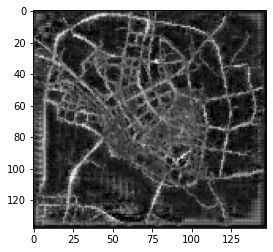

In [135]:
with open('./complete_map.npy', 'rb') as f:
    s = np.load(f)
    print(s.shape)
    plt.imshow(np.squeeze(s), cmap='gray')
    print('percentage of zero entry in current: ', np.count_nonzero((s==0)) / (138*148))

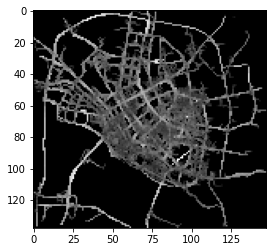

In [133]:
plt.imshow(S, cmap='gray')

RuntimeError: CUDA error: device-side assert triggered